In [59]:
import numpy as np
import pandas as pd
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
from sklearn.model_selection import train_test_split
import torch
import matplotlib.pyplot as plt
import torch.optim as optim

In [60]:
device=torch.device('cuda'if torch.cuda.is_available()else 'cpu')
device

device(type='cuda')

In [61]:
df= pd.read_csv("datasets/fashion-mnist_test.csv/fashion-mnist_test.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


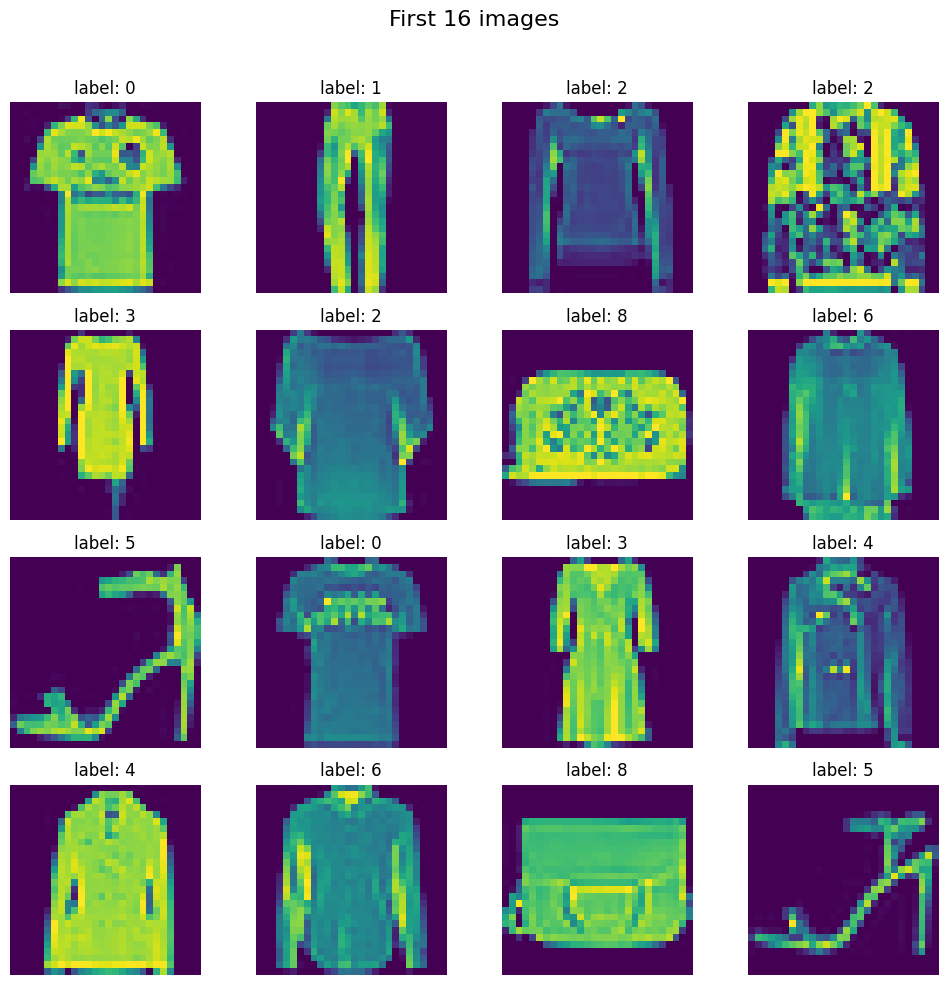

In [62]:
fig,axes=plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 images",fontsize=16)


for i,ax in enumerate(axes.flat):
    img=df.iloc[i,1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"label: {df.iloc[i,0]}")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [63]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [65]:
X_train=X_train/255.0
X_test=X_test/255.0

In [66]:
class CustomDataset(Dataset):
    def __init__(self,features,labels):
        self.features=torch.tensor(features, dtype=torch.float64).reshape(-1,1,28,28)
        self.labels=torch.tensor(labels,dtype=torch.long)

    def __len__(self):
        return len(self.features)
    def __getitem__(self, index):
        return self.features[index],self.labels[index]

In [67]:
train_dataset=CustomDataset(X_train,y_train)
test_dataset=CustomDataset(X_test,y_test)

In [68]:
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

In [73]:
class MyNN(nn.Module):
    def __init__(self,input_features):
        super().__init__()

        self.features=nn.Sequential(
            nn.Conv2d(input_features,32,kernel_size=3,padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=3,stride=2),

            nn.Conv2d(32,64,kernel_size=3,padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=3,stride=2),



        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(2304,128),
            nn.ReLU(),
            nn.Dropout(p=0.4),

            nn.Linear(128,64),
            nn.ReLU(),
            nn.Dropout(p=0.4),

            nn.Linear(64,10),
           

        )

    def forward(self,x):
        x=self.features(x)
        x=self.classifier(x)

        return x

In [74]:
lr=0.1
epochs=100

In [75]:
model=MyNN(1).to(device)

criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.1,weight_decay=1e-4)

In [76]:
for epochs in range(epochs):

    total_epoch_loss=0

    for batch_features,batch_labels in train_loader:
        batch_features,batch_labels=batch_features.to(device).float(),batch_labels.to(device)

        outputs=model(batch_features)

        loss=criterion(outputs,batch_labels)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        total_epoch_loss=total_epoch_loss+loss.item()

    avg_loss=total_epoch_loss/len(train_loader)

    print(f'Epoch:{epochs+1}, Loss:{avg_loss}')

Epoch:1, Loss:1.0471283991336822
Epoch:2, Loss:0.6827423982620239
Epoch:3, Loss:0.5991620617508888
Epoch:4, Loss:0.5344460881948471
Epoch:5, Loss:0.49450708252191544
Epoch:6, Loss:0.4523004644811153
Epoch:7, Loss:0.43012915629148485
Epoch:8, Loss:0.39893044584989545
Epoch:9, Loss:0.3867877624630928
Epoch:10, Loss:0.3724638328552246
Epoch:11, Loss:0.3408498142361641
Epoch:12, Loss:0.3193945828676224
Epoch:13, Loss:0.30737093541026117
Epoch:14, Loss:0.30303130543231965
Epoch:15, Loss:0.2953707411587238
Epoch:16, Loss:0.265961088322103
Epoch:17, Loss:0.26796072290837764
Epoch:18, Loss:0.2504131388813257
Epoch:19, Loss:0.24177597960457206
Epoch:20, Loss:0.23847117398679257
Epoch:21, Loss:0.2227805463373661
Epoch:22, Loss:0.2286354675143957
Epoch:23, Loss:0.20952087942510844
Epoch:24, Loss:0.2047016364187002
Epoch:25, Loss:0.20108460844308138
Epoch:26, Loss:0.2242043154463172
Epoch:27, Loss:0.19560365793853998
Epoch:28, Loss:0.175819729257375
Epoch:29, Loss:0.18159946451336145
Epoch:30, Los

In [77]:
model.eval()

MyNN(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2304, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.4, inplace=False)
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [79]:
total=0
correct=0
with torch.no_grad():

    for batch_features, batch_labels in test_loader:
        batch_features,batch_labels =batch_features.to(device).float(),batch_labels.to(device)

        outputs=model(batch_features)
        _, predicted=torch.max(outputs,1)
        total=total+batch_labels.shape[0]

        correct=correct+(predicted==batch_labels).sum().item()

    accuracy=correct/total
    
print(accuracy)

0.8995


In [82]:
total=0
correct=0
with torch.no_grad():

    for batch_features, batch_labels in train_loader:
        batch_features,batch_labels =batch_features.to(device).float(),batch_labels.to(device)

        outputs=model(batch_features)
        _, predicted=torch.max(outputs,1)
        total=total+batch_labels.shape[0]

        correct=correct+(predicted==batch_labels).sum().item()

    accuracy=correct/total
    
print(accuracy)

0.996625
